In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import string, nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('omw-1.4')

df = pd.read_csv('dataset3.txt')
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...


In [ ]:
df.isnull().sum()

deceptive    0
hotel        0
polarity     0
source       0
text         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   deceptive  1600 non-null   object
 1   hotel      1600 non-null   object
 2   polarity   1600 non-null   object
 3   source     1600 non-null   object
 4   text       1600 non-null   object
dtypes: object(5)
memory usage: 62.6+ KB


In [ ]:
df.describe()

,deceptive,hotel,polarity,source,text
count,1600,1600,1600,1600,1600
unique,2,20,2,3,1596
top,truthful,conrad,positive,MTurk,The Omni was chosen for it's location whichwor...
freq,800,80,800,800,2


In [ ]:
df['deceptive'].value_counts()

truthful     800
deceptive    800
Name: deceptive, dtype: int64

ValueError: ignored

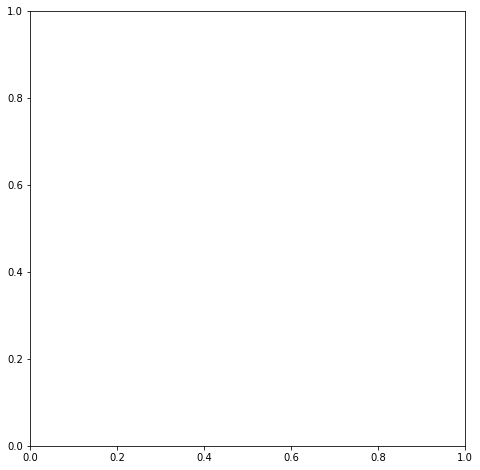

In [ ]:
plt.figure(figsize=(15,8))
labels = df['polarity'].value_counts().keys()
values = df['polarity'].value_counts().values
explode = (0.1,0,0,0,0)
plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.title('Proportion of each rating',fontweight='bold',fontsize=25,pad=20,color='crimson')
plt.show()

In [ ]:
def clean_text(text):
    nopunc = [w for w in text if w not in string.punctuation]
    nopunc = ''.join(nopunc)
    return  ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df['text'][0], clean_text(df['text'][0])

('We stayed for a one night getaway with family on a thursday. Triple AAA rate of 173 was a steal. 7th floor room complete with 44in plasma TV bose stereo, voss and evian water, and gorgeous bathroom(no tub but was fine for us) Concierge was very helpful. You cannot beat this location... Only flaw was breakfast was pricey and service was very very slow(2hours for four kids and four adults on a friday morning) even though there were only two other tables in the restaurant. Food was very good so it was worth the wait. I would return in a heartbeat. A gem in chicago... \n',
 'stayed one night getaway family thursday Triple AAA rate 173 steal 7th floor room complete 44in plasma TV bose stereo voss evian water gorgeous bathroomno tub fine us Concierge helpful cannot beat location flaw breakfast pricey service slow2hours four kids four adults friday morning even though two tables restaurant Food good worth wait would return heartbeat gem chicago')

In [ ]:
df['text'].head().apply(clean_text)

0    stayed one night getaway family thursday Tripl...
1    Triple rate upgrade view room less 200 also in...
2    comes little late Im finally catching reviews ...
3    Omni Chicago really delivers fronts spaciousne...
4    asked high floor away elevator got room pleasa...
Name: text, dtype: object

In [ ]:
df.shape

(1600, 5)

In [ ]:
df['text'] = df['text'].astype(str)

In [ ]:
def preprocess(text):
    return ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english') and not word.isdigit() and word not in string.punctuation])

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
preprocess(df['text'][4])

"I asked high floor away elevator I got The room pleasantly decorated functional clean I n't need whole lot service I pleasant prompt I used fitness center well equipped everything working order It great location one end Michigan Avenue shopping district"

In [ ]:
df['text'][:1600] = df['text'][:1600].apply(preprocess)

In [ ]:
# no commands
df['text_'][10001:20000] = df['text_'][10001:20000].apply(preprocess)

In [ ]:
df['text_'][20001:30000] = df['text_'][20001:30000].apply(preprocess)

In [ ]:
df['text_'][30001:40000] = df['text_'][30001:40000].apply(preprocess)
df['text_'][40001:40432] = df['text_'][40001:40432].apply(preprocess)

In [ ]:
df['text'] = df['text'].str.lower()

In [ ]:
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])
df['text'] = df['text'].apply(lambda x: stem_words(x))

In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
df["text"] = df["text"].apply(lambda text: lemmatize_words(text))

In [ ]:
df['text'].head()

0    we stay one night getaway famili thursday trip...
1    tripl a rate upgrad view room le also includ b...
2    thi come littl late i 'm final catch review pa...
3    the omni chicago realli deliv front spacious r...
4    i ask high floor away elev i got the room plea...
Name: text, dtype: object

In [ ]:
df.to_csv('Preprocessed Fake Reviews Detection Dataset.csv')

# Preprocessing of data completed here

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings, string
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv('Preprocessed Fake Reviews Detection Dataset.csv')
df.head()

,Unnamed: 0,deceptive,hotel,polarity,source,text
0,0,truthful,conrad,positive,TripAdvisor,we stay one night getaway famili thursday trip...
1,1,truthful,hyatt,positive,TripAdvisor,tripl a rate upgrad view room le also includ b...
2,2,truthful,hyatt,positive,TripAdvisor,thi come littl late i 'm final catch review pa...
3,3,truthful,omni,positive,TripAdvisor,the omni chicago realli deliv front spacious r...
4,4,truthful,hyatt,positive,TripAdvisor,i ask high floor away elev i got the room plea...


In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)


In [ ]:
df.head()

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,we stay one night getaway famili thursday trip...
1,truthful,hyatt,positive,TripAdvisor,tripl a rate upgrad view room le also includ b...
2,truthful,hyatt,positive,TripAdvisor,thi come littl late i 'm final catch review pa...
3,truthful,omni,positive,TripAdvisor,the omni chicago realli deliv front spacious r...
4,truthful,hyatt,positive,TripAdvisor,i ask high floor away elev i got the room plea...


In [ ]:
df.dropna(inplace=True)


In [ ]:
df['length'] = df['text'].apply(len)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 0 to 1599
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   deceptive  1600 non-null   object
 1   hotel      1600 non-null   object
 2   polarity   1600 non-null   object
 3   source     1600 non-null   object
 4   text       1600 non-null   object
 5   length     1600 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 87.5+ KB


In [ ]:
df.groupby('polarity').describe()

length                                                         
          count     mean         std   min     25%    50%    75%     max
polarity                                                                
negative  800.0  556.225  303.692832  98.0  350.00  495.5  673.5  2505.0
positive  800.0  397.905  211.286431  86.0  252.75  351.0  481.5  1552.0

In [ ]:
df.length.describe()

count    1600.000000
mean      477.065000
std       273.245442
min        86.000000
25%       295.000000
50%       415.000000
75%       586.250000
max      2505.000000
Name: length, dtype: float64

In [ ]:
def text_process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
bow_transformer = CountVectorizer(analyzer=text_process)
bow_transformer


CountVectorizer(analyzer=<function text_process at 0x7f4b33d05d40>)

In [ ]:
# (this process took time)
bow_transformer.fit(df['text'])
print("Total Vocabulary:",len(bow_transformer.vocabulary_))

Total Vocabulary: 7171


In [ ]:
review4 = df['text'][3]
review4

"the omni chicago realli deliv front spacious room help staff prize locat michigan avenu while address chicago requir high level qualiti omni deliv check whole group peopl minut staff plenti recommend dine event room largest 'll find price rang chicago even 'standard room separ live area work desk the fit center free weight weight machin two row cardio equip i share room other feel cramp way all great properti"

In [ ]:
bow_msg4 = bow_transformer.transform([review4])
print(bow_msg4)
print(bow_msg4.shape)

  (0, 380)	1
  (0, 610)	1
  (0, 720)	1
  (0, 1192)	1
  (0, 1237)	1
  (0, 1286)	1
  (0, 1309)	3
  (0, 1672)	1
  (0, 1860)	2
  (0, 1893)	1
  (0, 1949)	1
  (0, 2308)	1
  (0, 2341)	1
  (0, 2342)	1
  (0, 2499)	1
  (0, 2537)	1
  (0, 2561)	1
  (0, 2689)	1
  (0, 2719)	1
  (0, 2916)	1
  (0, 2941)	1
  (0, 3083)	1
  (0, 3103)	1
  (0, 3617)	1
  (0, 3690)	1
  :	:
  (0, 4008)	1
  (0, 4071)	1
  (0, 4433)	2
  (0, 4660)	1
  (0, 4771)	1
  (0, 4885)	1
  (0, 4916)	1
  (0, 4953)	1
  (0, 5011)	1
  (0, 5053)	1
  (0, 5080)	1
  (0, 5105)	1
  (0, 5227)	1
  (0, 5362)	4
  (0, 5381)	1
  (0, 5570)	1
  (0, 5613)	1
  (0, 5910)	1
  (0, 5981)	2
  (0, 5993)	1
  (0, 6589)	1
  (0, 6955)	1
  (0, 6981)	2
  (0, 7041)	1
  (0, 7095)	1
(1, 7171)


In [ ]:
print(bow_transformer.get_feature_names()[1500])
print(bow_transformer.get_feature_names()[238])

compliment
57


In [ ]:
# transforming the review - (this process took time)
bow_reviews = bow_transformer.transform(df['text'])

In [ ]:
print("Shape of Bag of Words Transformer for the entire reviews corpus:",bow_reviews.shape)
print("Amount of non zero values in the bag of words model:",bow_reviews.nnz)

Shape of Bag of Words Transformer for the entire reviews corpus: (1600, 7171)
Amount of non zero values in the bag of words model: 96347


In [ ]:
print("Sparsity:",np.round((bow_reviews.nnz/(bow_reviews.shape[0]*bow_reviews.shape[1]))*100,2))

Sparsity: 0.84


In [ ]:
tfidf_transformer = TfidfTransformer().fit(bow_reviews)
tfidf_rev4 = tfidf_transformer.transform(bow_msg4)
print(bow_msg4)

  (0, 380)	1
  (0, 610)	1
  (0, 720)	1
  (0, 1192)	1
  (0, 1237)	1
  (0, 1286)	1
  (0, 1309)	3
  (0, 1672)	1
  (0, 1860)	2
  (0, 1893)	1
  (0, 1949)	1
  (0, 2308)	1
  (0, 2341)	1
  (0, 2342)	1
  (0, 2499)	1
  (0, 2537)	1
  (0, 2561)	1
  (0, 2689)	1
  (0, 2719)	1
  (0, 2916)	1
  (0, 2941)	1
  (0, 3083)	1
  (0, 3103)	1
  (0, 3617)	1
  (0, 3690)	1
  :	:
  (0, 4008)	1
  (0, 4071)	1
  (0, 4433)	2
  (0, 4660)	1
  (0, 4771)	1
  (0, 4885)	1
  (0, 4916)	1
  (0, 4953)	1
  (0, 5011)	1
  (0, 5053)	1
  (0, 5080)	1
  (0, 5105)	1
  (0, 5227)	1
  (0, 5362)	4
  (0, 5381)	1
  (0, 5570)	1
  (0, 5613)	1
  (0, 5910)	1
  (0, 5981)	2
  (0, 5993)	1
  (0, 6589)	1
  (0, 6955)	1
  (0, 6981)	2
  (0, 7041)	1
  (0, 7095)	1


In [ ]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['mango']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['book']])

KeyError: ignored

In [ ]:
tfidf_reviews = tfidf_transformer.transform(bow_reviews)
print("Shape:",tfidf_reviews.shape)
print("No. of Dimensions:",tfidf_reviews.ndim)

# process of feature extraction ended

Shape: (1600, 7171)
No. of Dimensions: 2


In [ ]:
#training and testing data
review_train, review_test, label_train, label_test = train_test_split(df['text'],df['deceptive'],test_size=0.35)


In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [ ]:
pipeline.fit(review_train,label_train)
# this took time

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f4b33d05d40>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [ ]:
predictions = pipeline.predict(review_test)
predictions
#

array(['deceptive', 'truthful', 'deceptive', 'truthful', 'deceptive',
       'deceptive', 'deceptive', 'deceptive', 'truthful', 'deceptive',
       'deceptive', 'deceptive', 'truthful', 'truthful', 'truthful',
       'deceptive', 'deceptive', 'deceptive', 'deceptive', 'deceptive',
       'deceptive', 'deceptive', 'deceptive', 'truthful', 'truthful',
       'deceptive', 'deceptive', 'deceptive', 'deceptive', 'truthful',
       'deceptive', 'deceptive', 'truthful', 'truthful', 'deceptive',
       'truthful', 'deceptive', 'deceptive', 'truthful', 'truthful',
       'truthful', 'truthful', 'deceptive', 'truthful', 'deceptive',
       'deceptive', 'truthful', 'deceptive', 'truthful', 'truthful',
       'truthful', 'truthful', 'truthful', 'deceptive', 'deceptive',
       'truthful', 'deceptive', 'truthful', 'truthful', 'truthful',
       'truthful', 'deceptive', 'truthful', 'deceptive', 'deceptive',
       'deceptive', 'deceptive', 'deceptive', 'deceptive', 'deceptive',
       'truthful', 't

In [ ]:
print('Classification Report:',classification_report(label_test,predictions))
print('Confusion Matrix:',confusion_matrix(label_test,predictions))
print('Accuracy Score:',accuracy_score(label_test,predictions))

Classification Report:               precision    recall  f1-score   support

   deceptive       0.79      0.94      0.86       281
    truthful       0.93      0.75      0.83       279

    accuracy                           0.84       560
   macro avg       0.86      0.84      0.84       560
weighted avg       0.86      0.84      0.84       560

Confusion Matrix: [[265  16]
 [ 71 208]]
Accuracy Score: 0.8446428571428571


In [ ]:
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)) + '%')

Model Prediction Accuracy: 84.46%


In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [ ]:
pipeline.fit(review_train,label_train)
#

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f4b33d05d40>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [ ]:
rfc_pred = pipeline.predict(review_test)
rfc_pred
# took 1m36s

array(['deceptive', 'truthful', 'deceptive', 'truthful', 'deceptive',
       'deceptive', 'deceptive', 'deceptive', 'truthful', 'deceptive',
       'deceptive', 'deceptive', 'truthful', 'deceptive', 'truthful',
       'deceptive', 'truthful', 'truthful', 'deceptive', 'deceptive',
       'deceptive', 'deceptive', 'deceptive', 'truthful', 'truthful',
       'deceptive', 'deceptive', 'deceptive', 'deceptive', 'truthful',
       'deceptive', 'truthful', 'truthful', 'truthful', 'deceptive',
       'truthful', 'deceptive', 'deceptive', 'truthful', 'deceptive',
       'truthful', 'deceptive', 'deceptive', 'truthful', 'deceptive',
       'truthful', 'truthful', 'deceptive', 'deceptive', 'truthful',
       'truthful', 'truthful', 'truthful', 'deceptive', 'deceptive',
       'truthful', 'deceptive', 'truthful', 'truthful', 'truthful',
       'deceptive', 'truthful', 'deceptive', 'deceptive', 'deceptive',
       'deceptive', 'deceptive', 'deceptive', 'deceptive', 'truthful',
       'truthful', 't

In [ ]:
print('Classification Report:',classification_report(label_test,rfc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,rfc_pred))
print('Accuracy Score:',accuracy_score(label_test,rfc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')


Classification Report:               precision    recall  f1-score   support

   deceptive       0.78      0.86      0.82       281
    truthful       0.85      0.76      0.80       279

    accuracy                           0.81       560
   macro avg       0.81      0.81      0.81       560
weighted avg       0.81      0.81      0.81       560

Confusion Matrix: [[243  38]
 [ 68 211]]
Accuracy Score: 0.8107142857142857
Model Prediction Accuracy: 81.07%


In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',DecisionTreeClassifier())
])

In [ ]:
pipeline.fit(review_train,label_train)
#2m11s

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f4b33d05d40>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', DecisionTreeClassifier())])

In [ ]:
dtree_pred = pipeline.predict(review_test)
dtree_pred

array(['truthful', 'deceptive', 'deceptive', 'truthful', 'deceptive',
       'deceptive', 'deceptive', 'truthful', 'truthful', 'deceptive',
       'deceptive', 'truthful', 'truthful', 'truthful', 'truthful',
       'deceptive', 'truthful', 'truthful', 'deceptive', 'truthful',
       'deceptive', 'deceptive', 'deceptive', 'truthful', 'truthful',
       'deceptive', 'deceptive', 'deceptive', 'deceptive', 'truthful',
       'truthful', 'truthful', 'truthful', 'truthful', 'truthful',
       'deceptive', 'truthful', 'truthful', 'truthful', 'deceptive',
       'deceptive', 'deceptive', 'deceptive', 'truthful', 'deceptive',
       'deceptive', 'deceptive', 'truthful', 'deceptive', 'truthful',
       'truthful', 'truthful', 'truthful', 'truthful', 'deceptive',
       'truthful', 'deceptive', 'truthful', 'truthful', 'truthful',
       'deceptive', 'truthful', 'truthful', 'deceptive', 'truthful',
       'truthful', 'truthful', 'deceptive', 'deceptive', 'truthful',
       'truthful', 'truthful', 

In [ ]:
print('Classification Report:',classification_report(label_test,dtree_pred))
print('Confusion Matrix:',confusion_matrix(label_test,dtree_pred))
print('Accuracy Score:',accuracy_score(label_test,dtree_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

   deceptive       0.67      0.68      0.67       281
    truthful       0.67      0.67      0.67       279

    accuracy                           0.67       560
   macro avg       0.67      0.67      0.67       560
weighted avg       0.67      0.67      0.67       560

Confusion Matrix: [[190  91]
 [ 93 186]]
Accuracy Score: 0.6714285714285714
Model Prediction Accuracy: 67.14%


In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',KNeighborsClassifier(n_neighbors=2))
])

In [ ]:
pipeline.fit(review_train,label_train)
#1m57s

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f4b33d05d40>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', KNeighborsClassifier(n_neighbors=2))])

In [ ]:
knn_pred = pipeline.predict(review_test)
knn_pred

array(['deceptive', 'truthful', 'deceptive', 'deceptive', 'deceptive',
       'deceptive', 'deceptive', 'deceptive', 'deceptive', 'deceptive',
       'deceptive', 'deceptive', 'deceptive', 'deceptive', 'deceptive',
       'deceptive', 'deceptive', 'deceptive', 'deceptive', 'deceptive',
       'deceptive', 'deceptive', 'deceptive', 'deceptive', 'deceptive',
       'deceptive', 'deceptive', 'deceptive', 'deceptive', 'truthful',
       'deceptive', 'deceptive', 'deceptive', 'deceptive', 'deceptive',
       'deceptive', 'deceptive', 'deceptive', 'truthful', 'deceptive',
       'truthful', 'truthful', 'deceptive', 'deceptive', 'deceptive',
       'deceptive', 'truthful', 'deceptive', 'truthful', 'truthful',
       'deceptive', 'deceptive', 'deceptive', 'deceptive', 'deceptive',
       'truthful', 'deceptive', 'truthful', 'truthful', 'deceptive',
       'deceptive', 'truthful', 'truthful', 'deceptive', 'truthful',
       'deceptive', 'deceptive', 'deceptive', 'deceptive', 'truthful',
       

In [ ]:
print('Classification Report:',classification_report(label_test,knn_pred))
print('Confusion Matrix:',confusion_matrix(label_test,knn_pred))
print('Accuracy Score:',accuracy_score(label_test,knn_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

   deceptive       0.60      0.95      0.73       281
    truthful       0.88      0.35      0.51       279

    accuracy                           0.65       560
   macro avg       0.74      0.65      0.62       560
weighted avg       0.74      0.65      0.62       560

Confusion Matrix: [[267  14]
 [180  99]]
Accuracy Score: 0.6535714285714286
Model Prediction Accuracy: 65.36%


In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC())
])

In [ ]:
pipeline.fit(review_train,label_train)
#9m

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f4b33d05d40>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

In [ ]:
svc_pred = pipeline.predict(review_test)
svc_pred

array(['deceptive', 'truthful', 'deceptive', 'truthful', 'deceptive',
       'deceptive', 'deceptive', 'deceptive', 'truthful', 'deceptive',
       'deceptive', 'deceptive', 'truthful', 'truthful', 'deceptive',
       'deceptive', 'truthful', 'truthful', 'deceptive', 'deceptive',
       'deceptive', 'deceptive', 'deceptive', 'truthful', 'truthful',
       'deceptive', 'deceptive', 'deceptive', 'deceptive', 'truthful',
       'deceptive', 'deceptive', 'truthful', 'truthful', 'deceptive',
       'truthful', 'deceptive', 'deceptive', 'truthful', 'truthful',
       'truthful', 'truthful', 'deceptive', 'truthful', 'deceptive',
       'truthful', 'truthful', 'deceptive', 'truthful', 'truthful',
       'truthful', 'truthful', 'truthful', 'deceptive', 'truthful',
       'truthful', 'deceptive', 'truthful', 'truthful', 'truthful',
       'truthful', 'truthful', 'truthful', 'deceptive', 'deceptive',
       'truthful', 'deceptive', 'deceptive', 'deceptive', 'truthful',
       'truthful', 'truthfu

In [ ]:
print('Report:',classification_report(label_test,svc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,svc_pred))
print('Accuracy Score:',accuracy_score(label_test,svc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')

Report:               precision    recall  f1-score   support

   deceptive       0.87      0.88      0.87       281
    truthful       0.88      0.87      0.87       279

    accuracy                           0.87       560
   macro avg       0.87      0.87      0.87       560
weighted avg       0.87      0.87      0.87       560

Confusion Matrix: [[247  34]
 [ 37 242]]
Accuracy Score: 0.8732142857142857
Model Prediction Accuracy: 87.32%


In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())
])

In [ ]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f4b33d05d40>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [ ]:
lr_pred = pipeline.predict(review_test)
lr_pred

array(['deceptive', 'truthful', 'deceptive', 'truthful', 'deceptive',
       'deceptive', 'deceptive', 'deceptive', 'truthful', 'deceptive',
       'deceptive', 'deceptive', 'truthful', 'truthful', 'truthful',
       'deceptive', 'truthful', 'truthful', 'deceptive', 'deceptive',
       'deceptive', 'deceptive', 'deceptive', 'truthful', 'truthful',
       'deceptive', 'deceptive', 'deceptive', 'deceptive', 'truthful',
       'deceptive', 'deceptive', 'truthful', 'truthful', 'deceptive',
       'truthful', 'deceptive', 'deceptive', 'truthful', 'truthful',
       'truthful', 'truthful', 'deceptive', 'truthful', 'deceptive',
       'truthful', 'truthful', 'deceptive', 'truthful', 'truthful',
       'truthful', 'truthful', 'truthful', 'deceptive', 'truthful',
       'truthful', 'deceptive', 'truthful', 'truthful', 'truthful',
       'truthful', 'truthful', 'truthful', 'deceptive', 'deceptive',
       'truthful', 'deceptive', 'deceptive', 'deceptive', 'truthful',
       'truthful', 'truthful

In [ ]:
print('Report:',classification_report(label_test,lr_pred))
print('Confusion Matrix:',confusion_matrix(label_test,lr_pred))
print('Accuracy Score:',accuracy_score(label_test,lr_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')

Report:               precision    recall  f1-score   support

   deceptive       0.86      0.86      0.86       281
    truthful       0.86      0.86      0.86       279

    accuracy                           0.86       560
   macro avg       0.86      0.86      0.86       560
weighted avg       0.86      0.86      0.86       560

Confusion Matrix: [[243  38]
 [ 39 240]]
Accuracy Score: 0.8625
Model Prediction Accuracy: 86.25%


In [ ]:
#final output
print('Performance of various ML models:')
print('\n')
print('Logistic Regression Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')
print('K Nearest Neighbors Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')
print('Decision Tree Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')
print('Random Forests Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')
print('Support Vector Machines Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')
print('Multinomial Naive Bayes Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)) + '%')

Performance of various ML models:


Logistic Regression Prediction Accuracy: 86.25%
K Nearest Neighbors Prediction Accuracy: 65.36%
Decision Tree Classifier Prediction Accuracy: 67.14%
Random Forests Classifier Prediction Accuracy: 81.07%
Support Vector Machines Prediction Accuracy: 87.32%
Multinomial Naive Bayes Prediction Accuracy: 84.46%
